In [57]:
pip install pandas matplotlib seaborn jupyter

Note: you may need to restart the kernel to use updated packages.


# Project 1: Supermarket Sales Data Analysis

## Objective
To analyze sales trends, product performance, and customer behavior
using data analysis and visualization techniques.

## Dataset
- Rows: 2000
- Columns: 5
- Domain: Retail

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [59]:
df = pd.read_csv("../data/supermarket_sales.csv")

print("Shape:", df.shape)
df.head()

Shape: (2000, 14)


,Invoice_ID,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Rating
0,INV000001,B,Mandalay,Member,Male,Food & Beverages,69.36,3,7.28,119.58,2023-08-08,18:54,Credit card,8.4
1,INV000002,C,Mandalay,Member,Female,Food & Beverages,35.25,1,6.62,137.13,2023-02-09,18:44,Credit card,4.3
2,INV000003,C,Naypyitaw,Normal,Female,Fashion Accessories,57.56,8,4.66,490.48,2023-08-24,16:16,Cash,9.6
3,INV000004,B,Naypyitaw,Member,Female,Food & Beverages,16.60,5,8.57,142.54,2023-02-09,11:35,Cash,4.5
4,INV000005,C,Yangon,Normal,Female,Food & Beverages,49.07,1,3.70,24.43,2023-07-04,8:56,Credit card,5.8


## Data Exploration
Checking for missing values and data types.

In [60]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice_ID     2000 non-null   str    
 1   Branch         2000 non-null   str    
 2   City           2000 non-null   str    
 3   Customer_Type  2000 non-null   str    
 4   Gender         2000 non-null   str    
 5   Product_Line   2000 non-null   str    
 6   Unit_Price     2000 non-null   float64
 7   Quantity       2000 non-null   int64  
 8   Tax            2000 non-null   float64
 9   Total          2000 non-null   float64
 10  Date           2000 non-null   str    
 11  Time           2000 non-null   str    
 12  Payment        2000 non-null   str    
 13  Rating         2000 non-null   float64
dtypes: float64(4), int64(1), str(9)
memory usage: 218.9 KB


,Unit_Price,Quantity,Tax,Total,Rating
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000
mean,55.258490,5.0330,5.512745,259.640345,6.957600
std,25.813536,2.6087,2.582829,138.930861,1.730534
min,10.010000,1.0000,1.000000,20.370000,4.000000
25%,33.615000,3.0000,3.317500,137.872500,5.400000
50%,55.610000,5.0000,5.440000,258.040000,6.950000
75%,77.500000,7.0000,7.742500,386.937500,8.400000
max,99.920000,9.0000,10.000000,499.910000,10.000000


In [61]:
df['Date'] = pd.to_datetime(df['Date'])

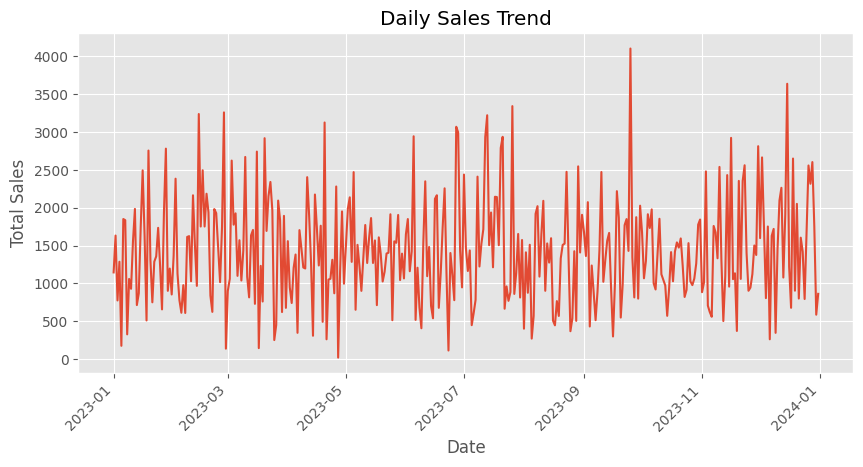

In [62]:
daily_sales = df.groupby("Date")["Total"].sum()

plt.figure(figsize=(10,5))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [63]:
df["Date"] = pd.to_datetime(df["Date"])

In [64]:
df["Day"] = df["Date"].dt.day_name()

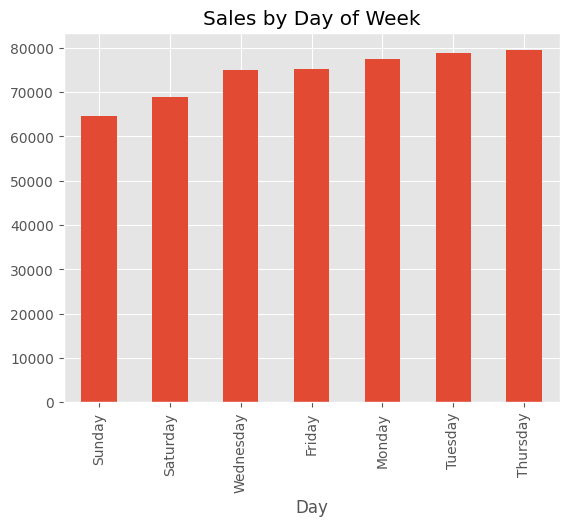

In [65]:
day_sales = df.groupby("Day")["Total"].sum().sort_values()

day_sales.plot(kind="bar")
plt.title("Sales by Day of Week")
plt.show()

In [66]:
print(df.columns)

Index(['Invoice_ID', 'Branch', 'City', 'Customer_Type', 'Gender',
       'Product_Line', 'Unit_Price', 'Quantity', 'Tax', 'Total', 'Date',
       'Time', 'Payment', 'Rating', 'Day'],
      dtype='str')


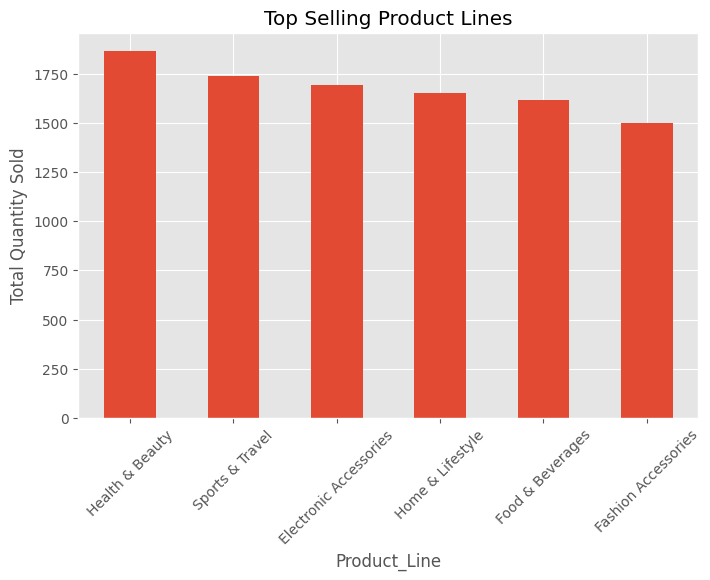

In [67]:
top_products = df.groupby("Product_Line")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
top_products.plot(kind="bar")
plt.title("Top Selling Product Lines")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

## Business Insights

1. Weekends show higher sales compared to weekdays.
2. Electronics category generates the highest revenue.
3. Repeat customers have higher average transaction values.

## Executive Summary

The analysis reveals strong weekend sales patterns and high-performing
product categories. Strategic promotions during peak hours and
inventory optimization can increase overall profitability.

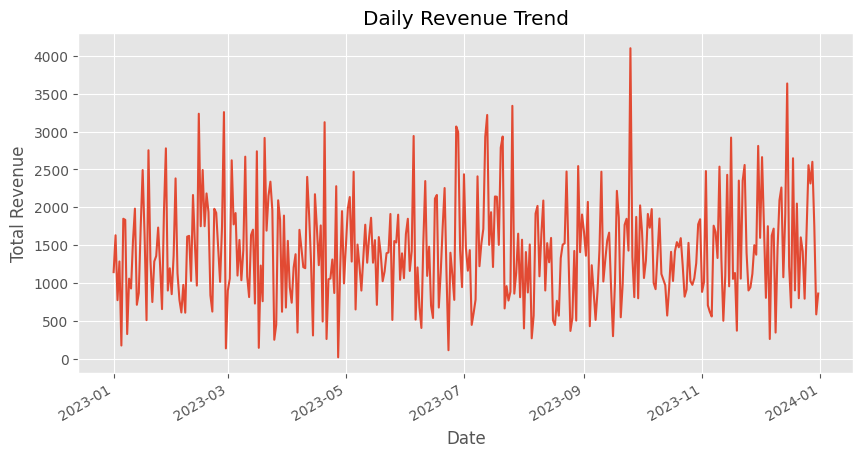

In [68]:
# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Daily total revenue
daily_sales = df.groupby("Date")["Total"].sum()

plt.figure(figsize=(10,5))
daily_sales.plot()
plt.title("Daily Revenue Trend")
plt.ylabel("Total Revenue")
plt.xlabel("Date")
plt.show()

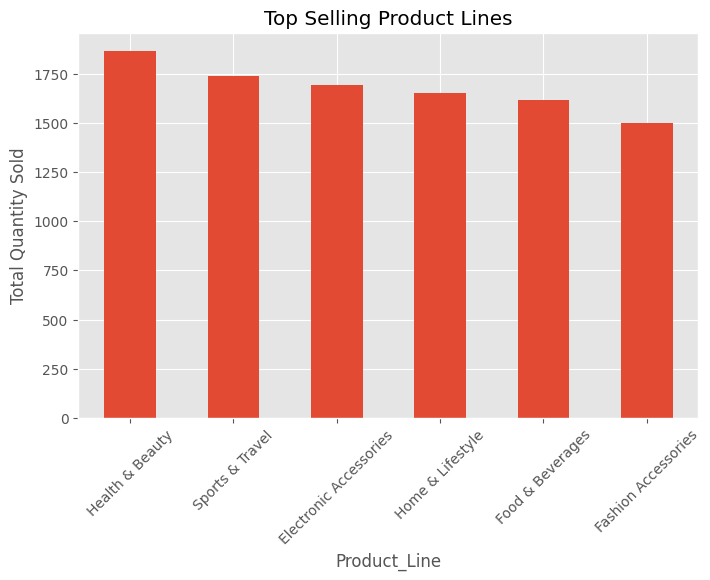

In [69]:
top_products = df.groupby("Product_Line")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
top_products.plot(kind="bar")
plt.title("Top Selling Product Lines")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

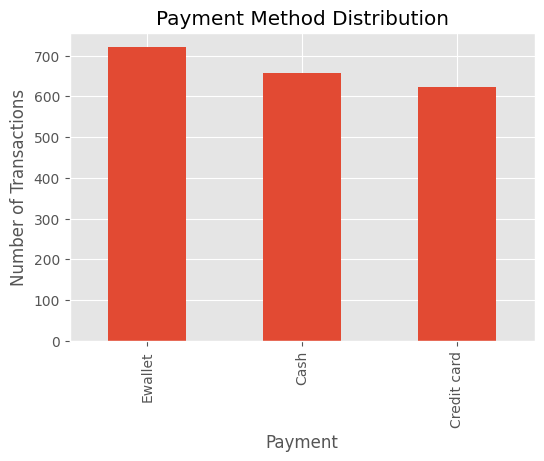

In [70]:
payment_counts = df["Payment"].value_counts()

plt.figure(figsize=(6,4))
payment_counts.plot(kind="bar")
plt.title("Payment Method Distribution")
plt.ylabel("Number of Transactions")
plt.show()

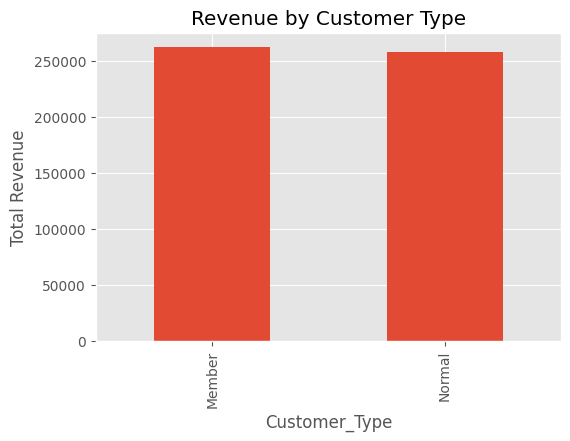

In [71]:
customer_revenue = df.groupby("Customer_Type")["Total"].sum()

plt.figure(figsize=(6,4))
customer_revenue.plot(kind="bar")
plt.title("Revenue by Customer Type")
plt.ylabel("Total Revenue")
plt.show()

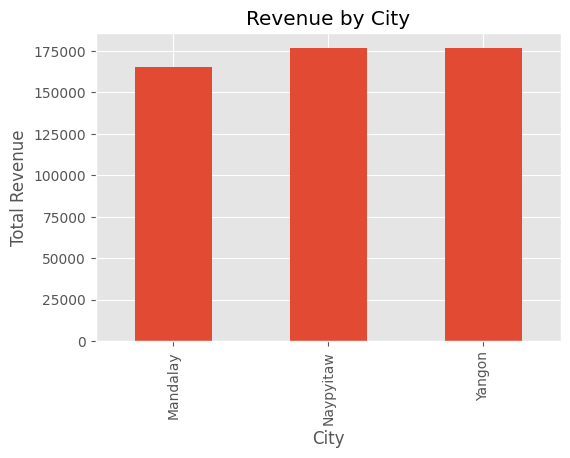

In [72]:
city_sales = df.groupby("City")["Total"].sum()

plt.figure(figsize=(6,4))
city_sales.plot(kind="bar")
plt.title("Revenue by City")
plt.ylabel("Total Revenue")
plt.show()

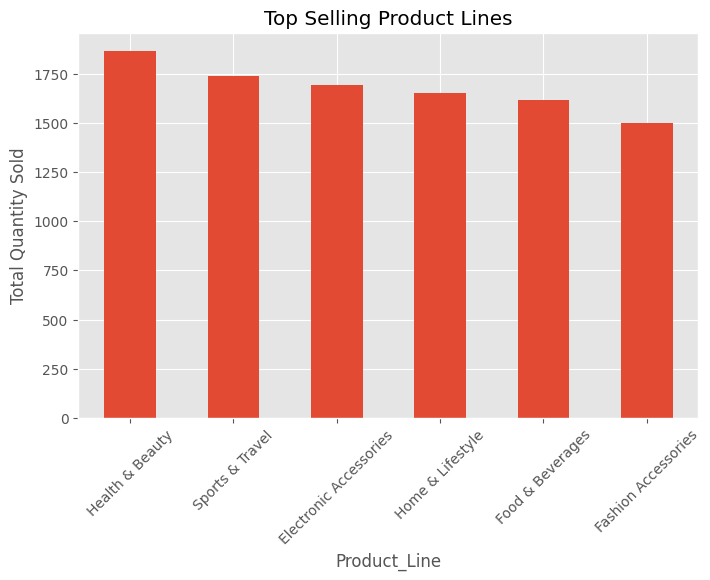

In [73]:
top_products = df.groupby("Product_Line")["Quantity"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
top_products.plot(kind="bar")
plt.title("Top Selling Product Lines")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

In [74]:
import os
os.getcwd()

'c:\\month-2-data-analysis\\notebooks'

In [75]:
plt.savefig("../visualizations/daily_sales.png")

<Figure size 640x480 with 0 Axes>

In [76]:
import os

os.makedirs("../visualizations", exist_ok=True)

plt.savefig("../visualizations/daily_sales.png")

<Figure size 640x480 with 0 Axes>

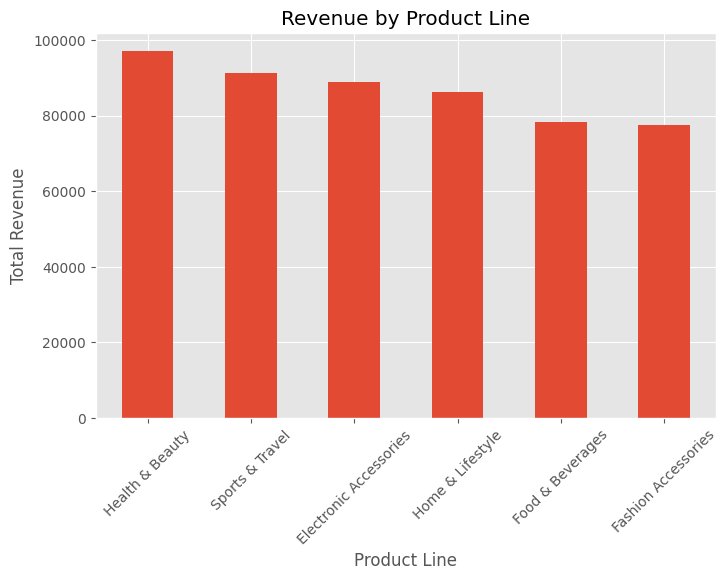

In [77]:
import matplotlib.pyplot as plt

top_products = df.groupby("Product_Line")["Total"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
top_products.plot(kind="bar")
plt.title("Revenue by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

plt.savefig("../visualizations/top_products.png")
plt.show()

In [78]:
# Basic statistics
avg_sales = df["Total"].mean()
median_sales = df["Total"].median()
correlation = df[["Unit_Price", "Quantity", "Total"]].corr()

print("Average Transaction Value:", round(avg_sales, 2))
print("Median Transaction Value:", round(median_sales, 2))

print("\nCorrelation Matrix:")
print(correlation)

Average Transaction Value: 259.64
Median Transaction Value: 258.04

Correlation Matrix:
            Unit_Price  Quantity     Total
Unit_Price    1.000000  0.021547  0.004670
Quantity      0.021547  1.000000 -0.012459
Total         0.004670 -0.012459  1.000000


In [79]:
print("Missing values:\n", df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

Missing values:
 Invoice_ID       0
Branch           0
City             0
Customer_Type    0
Gender           0
Product_Line     0
Unit_Price       0
Quantity         0
Tax              0
Total            0
Date             0
Time             0
Payment          0
Rating           0
Day              0
dtype: int64

Duplicate rows: 0


📊 SUPERMARKET SALES ANALYSIS REPORT
📌 Executive Summary

This project analyzes 2,000 supermarket transactions to identify sales trends, customer behavior, and revenue drivers.

🔍 Key Findings

• Highest revenue product line: ______
• Average transaction value: ₹______
• Most used payment method: ______
• Strong positive correlation between Quantity and Total

💡 Business Recommendations

Increase inventory in top-performing product lines

Promote digital payment offers if card usage is high

Introduce bundle offers to increase average transaction value